<img src="http://www.ubu.es/sites/default/files/portal_page/images/logo_color_2l_dcha.jpg" height="200" width="200" align="right"/> 
### Author: Eduardo Tubilleja Calvo 
### Director: Álvar Arnaiz González 
### Director: Juan José Rodríguez Díez
### Title: Example of base classifiers

### Table of contents:
* [Select the classifier](#classifier)
* [Fit the classifier](#fit)
* [Make a predict](#predict)
* [Make a predict_proba](#predict_proba)
* [Calculate measures](#measures)
* [Draw a tree](#tree)
* [Make CrossValidation](#cross)

In this notebook, we will see the example of a base classifier, that from some generated data, we train and predict them.

After this, different sklearn distances and measures are calculated, and we draw a tree to better appreciate the results.

Finally we use cross validation.


In [1]:
import numpy as np
import graphviz

from sklearn.datasets import make_multilabel_classification, make_moons
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

from sklearn_ubu.base_disturbing_neighbors import BaseDisturbingNeighbors
from sklearn_ubu.base_random_oracles import BaseRandomOracles
from sklearn_ubu.base_rotation_forest import BaseRotationForest


Parameters

In [2]:
seed = 0
cross_v=5
num_samples=80
num_features=10
noise=0.3
test_size=0.5
train_size=0.5

Takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples.

Choose multilabel or singlelabel.

In [3]:
X, y = make_multilabel_classification(
    n_samples=num_samples, n_features=num_features, random_state=seed)

In [4]:
X, y=make_moons(noise=noise, random_state=seed)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, train_size=train_size, random_state=seed)

<a id='classifier'></a>
Select classifier Disturbing Neighbors or Random Oracles or Rotation Forest

In [6]:
classifier = BaseDisturbingNeighbors(base_estimator=DecisionTreeClassifier(
        random_state=seed), random_state=seed)

In [7]:
classifier = BaseRandomOracles(base_estimator=DecisionTreeClassifier(
        random_state=seed), random_state=seed)

In [8]:
classifier=BaseRotationForest(base_estimator=DecisionTreeClassifier(
                      random_state=seed),random_state=seed)

Train of classifier<a id='fit'></a>

In [9]:
classifier.fit(X_train, y_train)

BaseRotationForest(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
          n_groups=3, per_samples=0.75, per_samples_classes=0.8,
          random_state=<mtrand.RandomState object at 0x000002148AB44090>)

After being fitted, the model can then be used to predict the class of samples:<a id='predict'></a>

In [10]:
y_predict = classifier.predict(X_test)

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:<a id='predict_proba'></a>

In [11]:
y_predict_proba = classifier.predict_proba(X_test)


Calculate different distances and measures <a id='measures'></a>

In [12]:
dist_hamming = hamming_loss(y_test, y_predict)
print("Hamming Loss:", dist_hamming)

dist_accuracy = accuracy_score(y_test, y_predict)
print("Accuracy Score:", dist_accuracy)

dist_jaccard = jaccard_similarity_score(y_test, y_predict)
print("Jaccard Similarity Score:", dist_jaccard)

dist_zero_one = zero_one_loss(y_test, y_predict)
print("Zero One Loss:", dist_zero_one)

measure_f1 = f1_score(y_test, y_predict, average='micro')
print("F1 Score:", measure_f1)

measure_precision = precision_score(y_test, y_predict, average='micro')
print("Precision Score:", measure_precision)

measure_fbeta = fbeta_score(y_test, y_predict, average='micro', beta=0.5)
print("Fbeta Score:", measure_fbeta)

measure_recall = recall_score(y_test, y_predict, average='micro')
print("Recall Score:", measure_recall)

Hamming Loss: 0.14
Accuracy Score: 0.86
Jaccard Similarity Score: 0.86
Zero One Loss: 0.14
F1 Score: 0.86
Precision Score: 0.86
Fbeta Score: 0.86
Recall Score: 0.86


Once trained, we can export the tree in Graphviz format using the export_graphviz exporter. If you use the conda package manager, the graphviz binaries and the python package can be installed with

    conda install python-graphviz
 
The export_graphviz exporter also supports a variety of aesthetic options. Jupyter notebooks also render these plots inline automatically:<a id='tree'></a>

If the classifier is RandomOracle, as for each element it has a classifier, in order to access the attribute where we have saved those classifiers, and in this case print the first one.

If not, we draw the base estimator.

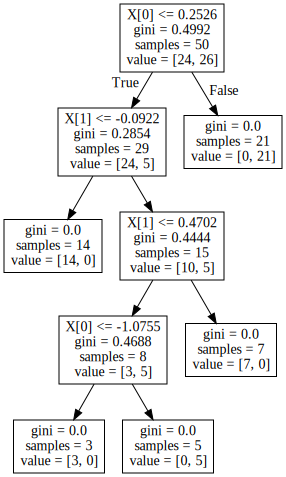

In [13]:
if(isinstance(classifier, BaseRandomOracles)):
    dot_data = export_graphviz(classifier._classifiers_train[0], out_file=None)
else:
    dot_data = export_graphviz(classifier.base_estimator, out_file=None)
graph = graphviz.Source(dot_data)
graph


Croos Validation <a id='cross'></a>

In [14]:
scores = cross_val_score(classifier, X, y, cv=cross_v)
average=np.mean(scores)
print(scores)
print(average)

[ 0.85  0.9   0.8   0.95  1.  ]
0.9
